# Example 1: Hupsel Brook model

This is the cases study #1 from the chapter 12 of the SWAP manual. This notebook aims to present the way the model is created in pySWAP package. It goes through the process of setting up the model, running the model and plotting the Epot results.

## 1. Setting up the model

For each major section of the main swp file, there is a class in pySWAP that needs to be created. Then, all the objects are collected into the main Model class that is responsible for running the model and capturing the results. Some auxiliary files like .crp have their own class objects that need to be created and attached to the main class for the section.

### Metadata and Simulation settings

In [1]:
from pyswap.core.metadata import Metadata
from pyswap.core.simsettings import SimSettings

meta = Metadata(author="John Doe",
                institution="University of Somewhere",
                email="john.doe@somewhere.com",
                project="pySWAP test - hupsel brook",
                swap_ver="4.2")

simset = SimSettings(
    swscre=1,
    swerror=1,
    tstart='2002-01-01',
    tend='2004-12-31',
    nprintday=1,
    swmonth=1,
    period=1,
    swres=0,
    swodat=0,
    outdat=['2002-01-31', '2004-12-31'],
    swyrvar=0,
    datefix='2004-12-31',
    swvap=1,
    swblc=1,
    swsba=1,
    swinc=1,
    swcsv=1,
    swafo=0,
    swaun=0,
    inlist_csv=['rain', 'irrig', 'interc', 'runoff', 'drainage',
                'dstor', 'epot', 'eact', 'tpot', 'tact', 'qbottom', 'gwl'],
    critdevmasbal=0.00001,
    numnodnew=6,
    dznew=[10.0, 10.0, 10.0, 20.0, 30.0, 50.0]
)

In [3]:
df.head()

,DATETIME,RAIN,IRRIG,INTERC,RUNOFF,EPOT,EACT,DRAINAGE,QBOTTOM,GWL,TPOT,TACT,DSTOR
0,2002-01-31,4.26,0.5,0.00000,0.0,0.00000,0.00000,2.99895,0.0,-64.59854,3.131000e-09,0.00000,1.76105
1,2002-02-28,12.27,0.0,0.00000,0.0,0.01590,0.01590,10.64373,0.0,-49.63714,2.828000e-09,0.00000,1.61037
2,2002-03-31,3.55,0.0,0.00000,0.0,0.19253,0.19253,6.43897,0.0,-73.61567,3.131000e-09,0.00000,-3.08149
3,2002-04-30,4.21,0.0,0.00000,0.0,0.40198,0.40198,2.23052,0.0,-64.93368,3.030000e-09,0.00000,1.57750
4,2002-05-31,5.28,0.0,0.02657,0.0,0.57016,0.57016,6.26083,0.0,-73.72813,1.962000e-02,0.01962,-1.59718


<Axes: >

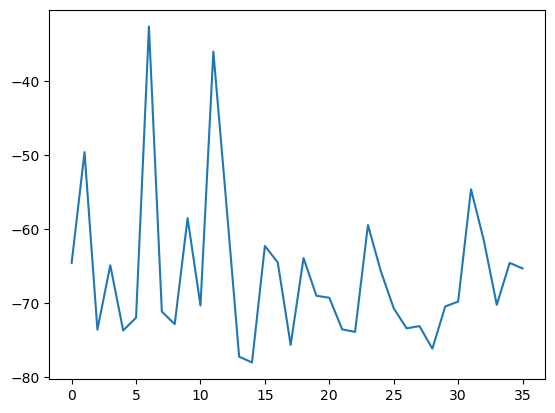

In [4]:
df['GWL'].plot()